In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# 1
# function to change brightness of image
def illumination(orig):
    from math import floor
    #image in hsv format
    im=cv2.cvtColor(orig,cv2.COLOR_BGR2HSV)
    
    # brightness value
    value=im[...,2]
#     mean_value=min(value)
#     print(mean_value)
    im[...,2]=np.where(value<140,185,185)
    im=cv2.cvtColor(im,cv2.COLOR_HSV2BGR)
    
    cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/illumination.jpg",im)    
    
    return im

In [3]:
# 2
# to preprocess image for tight crop
def preprocessing(orig) :
    
    #grayscale
    orig_gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
    
    #blur
    img_blur=cv2.GaussianBlur(orig_gray,(7,7),0)
    
    #pixels with value below 150 are turned black (0) and those with higher value are turned white (255)
    _,img_thresh=cv2.threshold(img_blur,150,255,cv2.THRESH_BINARY)
#     img_thresh=cv2.threshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11)
    
#     img_thresh=img_blur

    cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/preprocess.jpg",img_thresh)    
    
    return img_thresh

The contours in the original image detect separate lines and curves and not the digits and operators, therefore, we need to tightly crop the equation to further preprocess and detect the digits.

Contours parameters used :

cv2.RETR_TREE = OpenCv computes the hierarchy between the contours

cv2.CV_CHAIN_APPROX_SIMPLE = to save space

In [4]:
# 3
# sending threshold image and getting cropped contour enclosing equation
def tight_crop(img) :

    #image area
    area=img.shape[0]*img.shape[1]
    
    #x,x+w,y,y+h
    min_x=img.shape[0]
    min_y=img.shape[1]
    max_x=0
    max_y=0
    
    # finding contours
    _,cnts,_ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    #finding the contour enclosing the equation
    for cnt in cnts:
        x,y,w,h =  cv2.boundingRect(cnt)
        if w*h>area*0.002 and w*h != area:
    
            min_x=min(x,min_x)
            min_y=min(y,min_y)
            max_x=max(x+w,max_x)
            max_y=max(y+h,max_y)
        
    #save image
    new_image=img[min_y-10:max_y+10,min_x-10:max_x+10]
    
    cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/tight crop.jpg",new_image)    
    
    #coordinates
    coor=[min_x,min_y,max_x,max_y]

    
    return new_image,coor

Once the equation has been tightly cropped, we again apply some preprocessing and detect contours from the image. Since, our image now is more compact and has less noise, it is easy to detect the digits ans operators.

In [5]:
# # 4
# # contours
# def contours(orig_img,coor):
    
#     img=orig_img

#     #thresh
#     _,img_thresh=cv2.threshold(orig_img,120,250,cv2.THRESH_BINARY)  
    
#     #canny
#     img_canny=cv2.Canny(img_thresh,240,250)

#     # deletable code
#     cv2.imwrite(r'C:\Users\Dell\Desktop\Machine Learning\Text detection\detected\threshold.jpg',img_thresh)
#     cv2.imwrite(r'C:\Users\Dell\Desktop\Machine Learning\Text detection\detected\canny.jpg',img_canny)
    
    
#     # find contours
#     _,cnts,_= cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # 10 largest area contours
#     cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:10]
    
#     cv2.namedWindow('contours',cv2.WINDOW_NORMAL)
#     cv2.drawContours(img, cnts, -1, (128,0,0), 3)
#     cv2.imshow("contours", img)
#     cv2.waitKey()
            
#     cont=[]
#     contour_coor={}
    
#     indx=1
#     peri=[]
#     for cnt in cnts:
        
#         # approximate the contour
#         p = cv2.arcLength(cnt, True)
#         peri.append(p)
    
#     max_peri=max(peri)
    
#     for cnt in cnts:
        
#         p = cv2.arcLength(cnt, True)
        
#         if p < max_peri/2:
#             continue
                
#         x,y,w,h=cv2.boundingRect(cnt)
        
#         #contour coordinates
#         contour_coor[indx]=[x,x+w,y,y+h]
        
#         #append contours in array
#         cont.append(img[y:y+h,x:x+w])
            
#         #save contour images
#         crop_rect=img[y:y+h,x:x+w]
#         cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/"+str(indx)+".jpg",crop_rect)
            
#         indx+=1
    
#     return cont,contour_coor

In [6]:
# 4
# contours
def contours(orig_img,coor):
    
    img=orig_img[coor[1]-10:coor[3]+10,coor[0]-10:coor[2]+10]

#     #gray
#     img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
#     #blur
#     img_blur=cv2.GaussianBlur(img_gray,(11,11),0)

    #thresh
    _,img_thresh=cv2.threshold(orig_img,120,250,cv2.THRESH_BINARY)  
#     img_thresh=cv2.threshold(orig_img,250,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11)  
#     img_thresh=orig_img
    
    #canny
    img_canny=cv2.Canny(img_thresh,240,250)

    # deletable code
    cv2.imwrite(r'C:\Users\Dell\Desktop\Machine Learning\Text detection\detected\threshold.jpg',img_thresh)
    cv2.imwrite(r'C:\Users\Dell\Desktop\Machine Learning\Text detection\detected\canny.jpg',img_canny)
        
    # find contours
    _,cnts,_= cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
    #area of image
    area=img_canny.shape[0]*img_canny.shape[1]

    #save contours detected as array
    cont=[]
    
    #to save coordinates of contours
    contour_coor={}
    
    indx=0
    
    for cnt in cnts:
        
        x,y,w,h=cv2.boundingRect(cnt)
        
        if w*h>0.002*area and w*h!=area:
        
            #contour coordinates
            contour_coor[indx]=[x,x+w,y,y+h]
        
            #append contours in array
            cont.append(img[y:y+h,x:x+w])
            
            #save contour images
            crop_rect=orig_img[y:y+h,x:x+w]
            cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/"+str(indx)+".jpg",crop_rect)
            
            indx+=1
    
    return cont,contour_coor

Padding the cropped images

In [7]:
# 5
# pad crop image
def pad_image(images):

    new_images=[]
    for im in images:
        new_im=cv2.copyMakeBorder(im,top=40,bottom=40,left=40,right=40,borderType=cv2.BORDER_CONSTANT,value=[255,255,255])
        new_images.append(new_im)
    return new_images

To solve the division operator problem.

In [19]:
# 6
# divide solution
def adjustContour(contour_coor , image) :
    
    new_cont_coor = {}
    
    # list to save images
    new_images=[]
    dict_images={}
    
    #
    marked_index=[]
    
    # contour_coor is a dictionary that contains the values in the format of [x , x+w , y , y+h]
    for indx,item in contour_coor.items() :
        
        x = item[1] - item[0] # x+w - x
        y = item[3] - item[2] # y+h - y
        
        
        if x > 2*y :
            diff=image.shape[1]-y
            side = diff//2
            new_cont_coor[indx] = [item[0] , item[1] , item[2]-side , item[3]+side]
            marked_index.append(indx)
        
        else :
            new_cont_coor[indx] = item
            
        
        #contour coordinates
        a=new_cont_coor[indx][0]
        b=new_cont_coor[indx][1]
        c=new_cont_coor[indx][2]
        d=new_cont_coor[indx][3]
        
        
        #save contour images
        crop_rect=image[c:d,a:b]
        
#         crop_rect=pad_image(crop_rect)
        
        dict_images[indx]=crop_rect
#         new_images.append(crop_rect)
    
    # removing redundant contours
    for i in range(len(marked_index)):
        
        del_keys=[]
        left_limit=new_cont_coor[marked_index[i]][0]
        right_limit=new_cont_coor[marked_index[i]][1]
        
        #detect redundant contous
        for key in new_cont_coor.keys() :
            
            # centre coordinates of the present contour
            x_mid=(new_cont_coor[key][0]+new_cont_coor[key][1])/2
            
            #same contours
            if(key==marked_index[i]):
                continue
                
#             elif(new_cont_coor[marked_index[i]][0]<=new_cont_coor[key][0] and new_cont_coor[key][1]<=new_cont_coor[marked_index[i]][1]):
            elif(left_limit<=x_mid and x_mid<=right_limit):
                del_keys.append(key)
                
        #delete redundant contours
        for key in del_keys:
            del dict_images[key]
            del new_cont_coor[key]

        temp_coor={}
        temp_images={}
        count=0
        for key in new_cont_coor.keys() :
            temp_coor[count]=new_cont_coor[key]
            temp_images[count]=dict_images[key]
            count+=1
            
        new_cont_coor=temp_coor
        dict_images=temp_images
    
    new_images=[]
    for k,v in dict_images.items():
        new_images.append(v)
        
    return new_images,new_cont_coor    

# Sorting Function

In [9]:
# #original
# def sort(new_images,new_cont_coor):
    
#     im = new_images
#     cont = new_cont_coor
    
#     #sort according to y coordinates
#     for i in range(1,len(cont)):
#         for j in range(1,len(cont)-i+1):
            
#             if(cont[j][2]>cont[j+1][2]):
#                 cont[j],cont[j+1]=cont[j+1],cont[j]
#                 im[j-1],im[j]=im[j],im[j-1]
    
#     #sorting into different expressions
#     exps=[]
#     images = []
#     prev=0
    
#     for i in range(1,len(cont)):
#         if cont[i][3] < cont[i+1][2]:
#             new_list = list(cont.values())[prev:i+1]
#             new_img = im[prev:i+1]
#             exps.append(new_list)
#             images.append(new_img)
#             prev = i+1
    
#     images.append(im[prev:len(cont)])
#     exps.append(list(cont.values())[prev:len(cont)])
    
#     # Sorting each list w.r.t. to x co-ordinate
    
#     for i in range(len(images)):#first row of images

#         for k in range(len(images[i])):
#             for j in range(len(images[i])-k-1):#
            
#                 if exps[i][j][0] > exps[i][j+1][0] :
#                     images[i][j] , images[i][j+1] = images[i][j+1] , images[i][j]


#     return images , exps    

In [10]:
#sorting contours
def sort_contour(new_images,new_cont_coor):
    
    orig_img = new_images
    cont = new_cont_coor
    
    cont_coor = list(cont.values())
    cont_name = list(cont.keys())

    #sorting according to y co-ordinates
    for i in range(len(cont)-1):
        for j in range(len(cont)-i-1):
            
            if(cont_coor[j][2] > cont_coor[j+1][2]):
                cont_coor[j],cont_coor[j+1] = cont_coor[j+1],cont_coor[j]
                orig_img[j],orig_img[j+1] = orig_img[j+1],orig_img[j]

    indx = 1
    
    exps = []#containing the contours in row-wise order
    new_img = []#containing the images in row-wise order
    prev = 0#counter
    
    #sorting contours in row-wise order
    
    for i in range(len(cont)-1):
        if cont_coor[i][3] < cont_coor[i+1][2]:
            row_cont = cont_coor[prev:i+1]#all the same row contours in single list
            row_img = orig_img[prev:i+1]
            
            exps.append(row_cont)
            new_img.append(row_img)
            
            prev = i+1
    
    #appending left out contours
    new_img.append(orig_img[prev:len(orig_img)])
    exps.append(cont_coor[prev:len(cont)])
    
    
    #sorting according to x-coordinates
    for i in range(len(new_img)):#first row of images
        for k in range(len(new_img[i])-1):
            for j in range(len(new_img[i])-k-1):
                
                if exps[i][j][0] > exps[i][j+1][0] :
                    new_img[i][j] , new_img[i][j+1] = new_img[i][j+1] , new_img[i][j]
                    exps[i][j] , exps[i][j+1] = exps[i][j+1] , exps[i][j]
    
    return new_img , exps    

In [11]:
# #7
# #sorting contours
# def BubbleSort(new_images,new_cont_coor) :
    
#     for i in range(1,len(new_cont_coor)):
#         for j in range(1,len(new_cont_coor)-i+1):
            
#             if(new_cont_coor[j][0]>new_cont_coor[j+1][0]):
#                 new_cont_coor[j],new_cont_coor[j+1]=new_cont_coor[j+1],new_cont_coor[j]
#                 new_images[j-1],new_images[j]=new_images[j],new_images[j-1]

#     return new_images,new_cont_coor

In [12]:
#7 updated
#sorting contours
def BubbleSort(new_images,new_cont_coor) :
    
    for i in range(len(new_cont_coor)-1):
        for j in range(len(new_cont_coor)-i-1):
            
            if(new_cont_coor[j][0] > new_cont_coor[j+1][0]):
                new_cont_coor[j],new_cont_coor[j+1] = new_cont_coor[j+1],new_cont_coor[j]
                new_images[j],new_images[j+1] = new_images[j+1],new_images[j]

    return new_images,new_cont_coor

# Run

In [20]:
im=cv2.imread(r"C:\Users\Dell\Desktop\Machine Learning\Text detection\testingimages\test13.jpg")

# brighten image
im=illumination(im)

# preprocess
new_img = preprocessing(im)

# cropped image array and outputs tight crop
new_img,coor=tight_crop(new_img) 

# sending original image according to tight crop coordiantes
# output: contours of digits and their coordinates
conts,contour_coor=contours(new_img,coor)

# encapsulating contours to solve divison operator problem
images,new_contour_coor=adjustContour(contour_coor,new_img)

# pad images
new_images=pad_image(images)

# sorting the contours according to coordinates
#print(new_contour_coor)
new_images,new_contour_coor=sort_contour(new_images,new_contour_coor)
#print(Cont)
# new_images,new_contour_coor=BubbleSort(new_images,new_contour_coor)
#new_images,new_contour_coor=BubbleSort(Im,new_contour_coor)

# save images
indx=1
for i in new_images:
    for j in i :
        cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/correct/"+str(indx)+".jpg",j)
        indx+=1

#for im in Im:
#     cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/correct/"+str(indx)+".jpg",im)
#     indx+=1

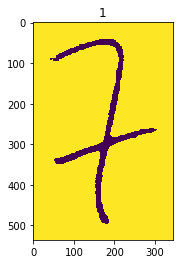

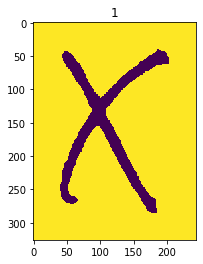

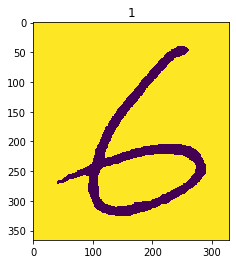

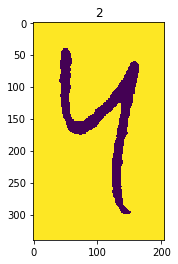

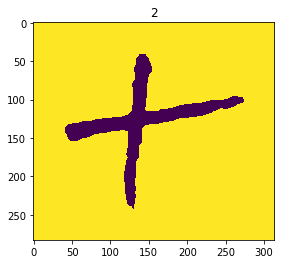

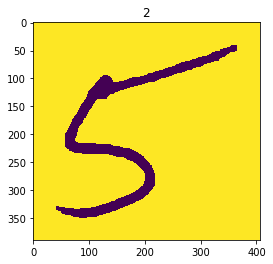

In [47]:
indx=1
for i in Im:
    for j in i :
        plt.figure()
        plt.title(indx)
        plt.imshow(j)
    indx+=1
plt.show()

In [27]:
def capture_img() :
    time.sleep(5)
    video_capture = cv2.VideoCapture(0)
    print('cam w',video_capture.get(3))
    print('cam h',video_capture.get(4))
    
    video_capture.set(3,1024)
    video_capture.set(4,768)
    
    if not video_capture.isOpened() :
        raise Exception('Can not open webcam')
    ret , frame = video_capture.read()
    print(frame.shape)
    return frame  

In [31]:
def start_process() :
    
    # webcam image
    cap_im=capture_img()
    
    
    cv2.imshow('capture',cap_im)
    cv2.waitKey(0)
    
    # brighten image
    im=illumination(im)

    # preprocess
    new_img = preprocessing(im)

    # cropped image array and outputs tight crop
    new_img,coor=tight_crop(new_img) 

    # sending original image according to tight crop coordiantes
    # output: contours of digits and their coordinates
    conts,contour_coor=contours(new_img,coor)

    # encapsulating contours to solve divison operator problem
    images,new_contour_coor=adjustContour(contour_coor,new_img)

    # pad images
    new_images=pad_image(images)

    # sorting the contours according to coordinates
    new_images,new_contour_coor=BubbleSort(new_images,new_contour_coor)

    # save images
    indx=1
    for im in new_images:
        cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/correct/"+str(indx)+".jpg",im)
        indx+=1    
    return cap_im

In [33]:
im=start_process() 

cam w 640.0
cam h 480.0
(720, 1280, 3)


ValueError: max() arg is an empty sequence

# Module

In [17]:
import numpy as np
import cv2

class contour_detection() :
    
    def __init__(self,image):
        self.im= image
        
        # brighten image
        self.im= self.illumination(self.im)

        # preprocess
        self.new_img = self.preprocessing(self.im)

        # cropped image array and outputs tight crop
        self.new_img, self.coor= self.tight_crop(self.new_img) 

        # sending original image according to tight crop coordiantes
        self.conts, self.contour_coor= self.contours(self.new_img,self.coor)

        #encapsulating contours to solve divison operator problem
        self.images, self.new_contour_coor= self.adjustContour(self.contour_coor,self.new_img)

        # pad images
        self.new_images=self.pad_image(self.images)

        # sorting the contours according to coordinates
        self.new_conts,self.new_contour_coor=self.sort_contour(self.new_images,self.new_contour_coor)
        
    # function to change brightness of image
    def illumination(self,orig):

        #image in hsv format
        im=cv2.cvtColor(orig,cv2.COLOR_BGR2HSV)

        # brightness value
        value=im[...,2]
        im[...,2]=np.where(value<140,185,185)

        im=cv2.cvtColor(im,cv2.COLOR_HSV2BGR)
        
        # save image
        cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/illumination.jpg",im)

        return im
    
    # to preprocess image for tight crop
    def preprocessing(self,orig) :

        # grayscale
        orig_gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)

        # blur
        img_blur=cv2.GaussianBlur(orig_gray,(7,7),0)

        #p ixels with value below 150 are turned black (0) and those with higher value are turned white (255)
        _,img_thresh=cv2.threshold(img_blur,150,255,cv2.THRESH_BINARY)

        # save image
        cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/preprocess.jpg",img_thresh)    

        return img_thresh
    
    # sending threshold image and getting cropped contour enclosing equation
    def tight_crop(self,img) :

        #image area
        area=img.shape[0]*img.shape[1]

        # contour coordinates
        # x,x+w,y,y+h
        min_x=img.shape[0]
        min_y=img.shape[1]
        max_x=0
        max_y=0

        # finding contours
        _,cnts,_ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        #finding the contour enclosing the equation
        for cnt in cnts:
            x,y,w,h =  cv2.boundingRect(cnt)
            if w*h>area*0.002 and w*h != area:

                min_x=min(x,min_x)
                min_y=min(y,min_y)
                max_x=max(x+w,max_x)
                max_y=max(y+h,max_y)

        # save image in list
        new_image=img[min_y-10:max_y+10,min_x-10:max_x+10]
        
        # save contour coordinates
        coor=[min_x,min_y,max_x,max_y]

        # save image to local
        cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/tight crop.jpg",new_image)    

        return new_image,coor

    
    # contours
    def contours(self,orig_img,coor):

        img=orig_img[coor[1]-10:coor[3]+10,coor[0]-10:coor[2]+10]

        #thresh
        _,img_thresh=cv2.threshold(orig_img,120,250,cv2.THRESH_BINARY)  

        #canny
        img_canny=cv2.Canny(img_thresh,240,250)

        # find contours
        _,cnts,_= cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # area of image
        area=img_canny.shape[0]*img_canny.shape[1]

        # save detected contours in a list
        cont=[]

        #to save coordinates of contours
        contour_coor={}

        indx=0
        for cnt in cnts:

            x,y,w,h=cv2.boundingRect(cnt)

            if w*h>0.002*area and w*h!=area:

                #contour coordinates
                contour_coor[indx]=[x,x+w,y,y+h]

                #append contours in array
                cont.append(img[y:y+h,x:x+w])

                #save contour images
                crop_rect=img[y:y+h,x:x+w]
                
                indx+=1
                
                #save contour to local
                cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/"+str(indx)+".jpg",crop_rect)

        # save images to local
        cv2.imwrite(r'C:\Users\Dell\Desktop\Machine Learning\Text detection\detected\threshold.jpg',img_thresh)
        cv2.imwrite(r'C:\Users\Dell\Desktop\Machine Learning\Text detection\detected\canny.jpg',img_canny)
        
        return cont,contour_coor
    
    # divide solution
    def adjustContour(self,contour_coor , image) :

        new_cont_coor = {}

        # list to save images
        new_images=[]
        dict_images={}

        # to save the overlapping contours
        marked_index=[]

        # contour_coor is a dictionary that contains the values in the format of [x , x+w , y , y+h]
        for indx,item in contour_coor.items() :

            x = item[1] - item[0] # x+w - x
            y = item[3] - item[2] # y+h - y


            if x > 2*y :
                diff=image.shape[1]-y
                side = diff//2
                new_cont_coor[indx] = [item[0] , item[1] , item[2]-side , item[3]+side]
                marked_index.append(indx)

            else :
                new_cont_coor[indx] = item


            #contour coordinates
            a=new_cont_coor[indx][0]
            b=new_cont_coor[indx][1]
            c=new_cont_coor[indx][2]
            d=new_cont_coor[indx][3]


            #save contour images
            crop_rect=image[c:d,a:b]

            # creating a dictionary
            dict_images[indx]=crop_rect

        # removing redundant contours
        for i in range(len(marked_index)):

            del_keys=[]
            left_limit=new_cont_coor[marked_index[i]][0]
            right_limit=new_cont_coor[marked_index[i]][1]

            #detect redundant contous
            for key in new_cont_coor.keys() :

                # centre coordinates of the present contour
                x_mid=(new_cont_coor[key][0]+new_cont_coor[key][1])/2

                # same contours
                if(key==marked_index[i]):
                    continue
                
                # to remove overlapping contours
                elif(left_limit<=x_mid and x_mid<=right_limit):
                    del_keys.append(key)

            #delete redundant contours
            for key in del_keys:
                del dict_images[key]
                del new_cont_coor[key]

            temp_coor={}
            temp_images={}
            count=0
            for key in new_cont_coor.keys() :
                temp_coor[count]=new_cont_coor[key]
                temp_images[count]=dict_images[key]
                count+=1

            new_cont_coor=temp_coor
            dict_images=temp_images

        new_images=[]
        for k,v in dict_images.items():
            new_images.append(v)

        return new_images,new_cont_coor           

    # pad crop image
    def pad_image(self,images):

        new_images=[]
        for im in images:
            new_im=cv2.copyMakeBorder(im,top=40,bottom=40,left=40,right=40,borderType=cv2.BORDER_CONSTANT,value=[255,255,255])
            new_images.append(new_im)
        return new_images
    
    #sorting contours
    def sort_contour(self,new_images,new_cont_coor):

        orig_img = new_images
        cont = new_cont_coor

        cont_coor = list(cont.values())
        cont_name = list(cont.keys())

        #sorting according to y co-ordinates
        for i in range(len(cont)-1):
            for j in range(len(cont)-i-1):
                if(cont_coor[j][2] > cont_coor[j+1][2]):
                    cont_coor[j],cont_coor[j+1] = cont_coor[j+1],cont_coor[j]
                    orig_img[j],orig_img[j+1] = orig_img[j+1],orig_img[j]

        indx = 1

        exps = []#containing the contours in row-wise order
        new_img = []#containing the images in row-wise order
        prev = 0#counter

        #sorting contours in row-wise order

        for i in range(len(cont)-1):
            if cont_coor[i][3] < cont_coor[i+1][2]:
                row_cont = cont_coor[prev:i+1]#all the same row contours in single list
                row_img = orig_img[prev:i+1]
                exps.append(row_cont)
                new_img.append(row_img)
                prev = i+1

        #appending left out contours
        new_img.append(orig_img[prev:len(orig_img)])
        exps.append(cont_coor[prev:len(cont)])

        #sorting according to x-coordinates
        for i in range(len(new_img)):#first row of images
            for k in range(len(new_img[i])-1):
                for j in range(len(new_img[i])-k-1):
                    if exps[i][j][0] > exps[i][j+1][0] :
                        new_img[i][j] , new_img[i][j+1] = new_img[i][j+1] , new_img[i][j]
                        exps[i][j] , exps[i][j+1] = exps[i][j+1] , exps[i][j]

        return new_img , exps    

In [18]:
im=cv2.imread(r"C:\Users\Dell\Desktop\Machine Learning\Text detection\testingimages\test10.jpg")

In [19]:
obj=contour_detection(im)

# save images
indx=1
for row_im in obj.new_conts:
    for im in row_im:
        cv2.imwrite(r"C:/Users/Dell/Desktop/Machine Learning/Text detection/detected/correct/"+str(indx)+".jpg",im)
        indx+=1